<a href="https://colab.research.google.com/github/roshanraii/typeofball-classifier/blob/master/notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required libraries**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

**defining the batch size**

In [ ]:
bs=64

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"roshanraii","key":"7ba5c08ff722f462693fc125e9b357d1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**downloading our dataset from kaggle**

In [ ]:
!kaggle datasets download -d roshanraii/typesofball

 67% 25.0M/37.1M [00:00<00:00, 16.1MB/s]
100% 37.1M/37.1M [00:01<00:00, 38.2MB/s]


make directory for unziping the dataset file into it

In [ ]:
!mkdir typesofball

unzip the dataset zip file into that directory we created above

In [ ]:
!unzip typesofball.zip -d typesofball

Archive:  typesofball.zip
  inflating: typesofball/americanfootball/00000000.jpg  
  inflating: typesofball/americanfootball/00000001.jpg  
  inflating: typesofball/americanfootball/00000002.jpg  
  inflating: typesofball/americanfootball/00000003.jpg  
  inflating: typesofball/americanfootball/00000004.jpg  
  inflating: typesofball/americanfootball/00000005.jpg  
  inflating: typesofball/americanfootball/00000006.jpg  
  inflating: typesofball/americanfootball/00000007.jpg  
  inflating: typesofball/americanfootball/00000008.jpg  
  inflating: typesofball/americanfootball/00000009.jpg  
  inflating: typesofball/americanfootball/00000010.jpg  
  inflating: typesofball/americanfootball/00000011.jpg  
  inflating: typesofball/americanfootball/00000012.jpg  
  inflating: typesofball/americanfootball/00000013.jpg  
  inflating: typesofball/americanfootball/00000014.jpg  
  inflating: typesofball/americanfootball/00000015.jpg  
  inflating: typesofball/americanfootball/00000016.jpg  
  inf

Saving our directory path to a variable so that we don"t have to write so long everytime to refer to the directory

In [ ]:
path ="/content/typesofball"

***Definig classes that data contains Although it is not required for training purpose but we will use it for other purposes***

In [ ]:
classes = ['americanfootball','baseball','basketball','cricketball','football','golfball','handball','tennisball','volleyball']

***Making sure that every image is readable else image get deleted***

In [ ]:
for c in classes:
    print(c)
    verify_images(path+"/"+c, delete=True, max_size=500)

americanfootball


baseball


basketball


cricketball


football


golfball


handball


tennisball


volleyball


In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes 

['americanfootball',
 'baseball',
 'basketball',
 'cricketball',
 'football',
 'golfball',
 'handball',
 'tennisball',
 'volleyball']

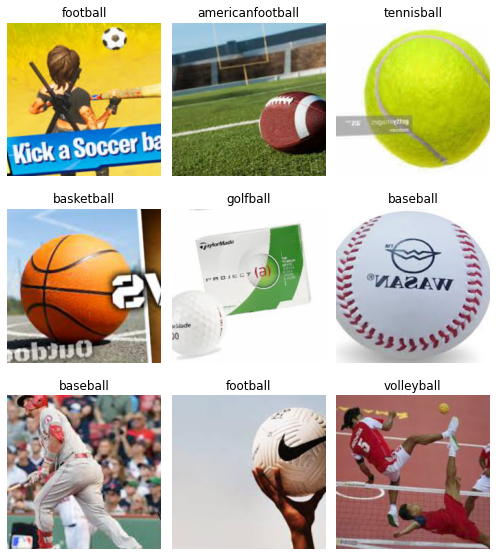

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['americanfootball',
  'baseball',
  'basketball',
  'cricketball',
  'football',
  'golfball',
  'handball',
  'tennisball',
  'volleyball'],
 9,
 3448,
 861)

***Creating a model to get trained...***


In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.568452,0.901466,0.240418,01:04
1,1.073735,0.807899,0.224158,00:59
2,0.842699,0.683561,0.221835,00:59
3,0.654767,0.634897,0.177700,00:59
4,0.536608,0.575372,0.170732,01:00
5,0.429240,0.568960,0.177700,01:00
6,0.356714,0.547398,0.173055,01:00
7,0.305935,0.539035,0.164925,01:00


In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


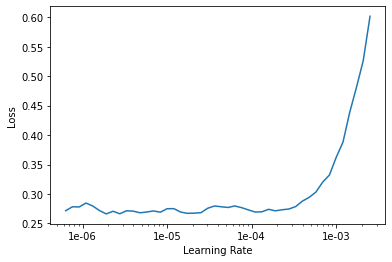

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.294207,0.548980,0.162602,01:17
1,0.296688,0.553822,0.168409,01:18
2,0.292138,0.644834,0.153310,01:17
3,0.267126,0.574965,0.163763,01:17
4,0.193108,0.535161,0.138211,01:18
5,0.132498,0.529368,0.145180,01:18
6,0.097015,0.527904,0.147503,01:17
7,0.083722,0.520758,0.142857,01:17


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

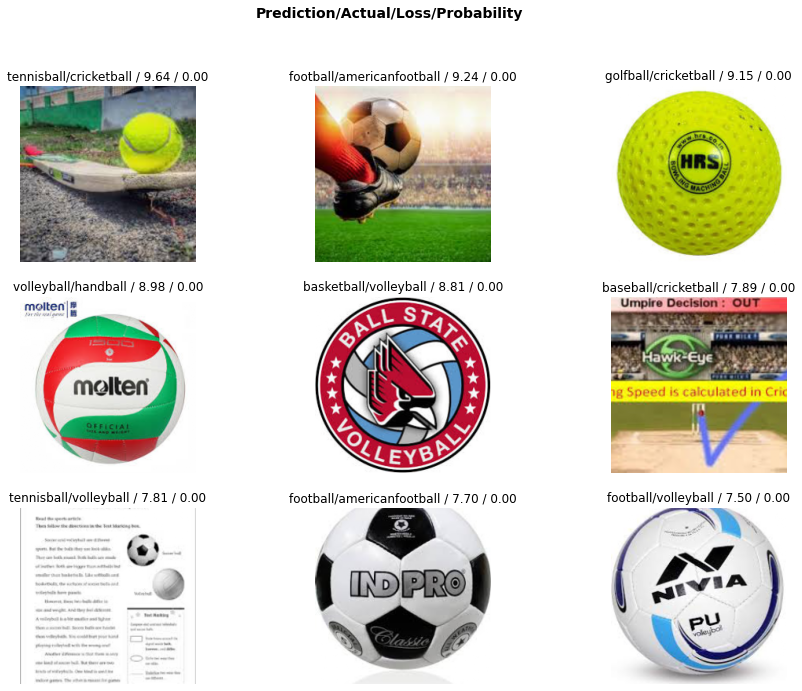

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/typesofball",exist_ok=True)

***Saving our directory path to a variable so that we don"t have to write so long everytime to refer to the directory***

In [ ]:
my_dir="/content/drive/My Drive/dl_projects/typesofball"

***Saving the state with name as stage-1 in Google drive directory..***

***A bit detail about this  is that It have stored the state of learner now like we have trained and saved the state now it contains all the info even training info so that's pretty useful thing ***

***It"s bit different from the thing called as model we will talk about that some other day..***

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.load("/content/drive/My Drive/dl_projects/typesofball/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (3448 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
football,football,football,football,football
Path: /content/typesofball;

Valid: LabelList (861 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
football,cricketball,cricketball,baseball,golfball
Path: /content/typesofball;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05

***exporting the pickle file for loading trained model for prediction***

In [ ]:
learn.export(my_dir+"/export.pkl")